In [4]:
# third cell -
import pandas as pd
import numpy as np
howell_full = pd.read_csv("Howell.csv", sep=";")


In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))



Train size:  435 Test size:  109


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X = train_set[['height']]
y = train_set['weight']

X_test = test_set[['height']]
y_test = test_set['weight']

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
poly4 = PolynomialFeatures(degree=4, include_bias=False)
scale = StandardScaler()
lr_model = LinearRegression()

stages = [('imp_mean', imp_mean),
 ('poly4', poly4),
 ('scale', scale),
 ('lr_model', lr_model),
 ]
pipe_model = Pipeline(stages)

pipe_model.fit(X,y)

y_pred = pipe_model.predict(X)
print('Results for pipeline linear regression on training data')
#print('  Default settings')
#print('Internal parameters:')
print('   Bias is ', pipe_model.predict([[0]]))
#print('   Coefficients', pipe_model.coef_)
print('   Score', pipe_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = pipe_model.predict(X_test)
print()
print('Results for pipeline linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))


Results for pipeline linear regression on training data
   Bias is  [-166.29034128]
   Score 0.9368954928231886
MAE is   2.7616342586302083
RMSE is  3.700602610294632
MSE is  13.694459679319444
R^2     0.9368954928231886

Results for pipeline linear regression on test data
MAE is   3.090635447854559
RMSE is  4.136777328711964
MSE is  17.112926667345288
R^2     0.9196783079821769


C:\Users\chris\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


C:\Users\chris\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


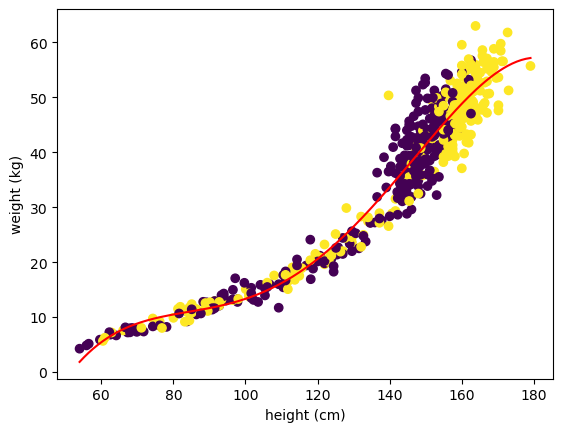

In [7]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']
age = howell_full['age']

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = pipe_model.predict(inputs)

plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')

plt.plot(x_values, y_values,c='red')
plt.show()

In [8]:
import pickle
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

#heights to check
heights = [[0], [50], [100], [150], [175], [200]]
weights = pipe_model.predict(heights)
print('Input heights: ', heights)
print('Predicted weights are: ', weights)

Input heights:  [[0], [50], [100], [150], [175], [200]]
Predicted weights are:  [-166.29034128   -1.39346992   13.32603623   41.40189304   56.42986106
   44.77557652]


C:\Users\chris\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
